

# Project: Investigate a Dataset - TMDB DATA ANALYSIS

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### Dataset Description

> In this project, i will be analyzing the TMDB dataset, The dataset contains information about movies collected from the TMDB. A number of characteristics about each movie is included in each row. The dataset contains some of the followig attribute:
>> budget - The budget allocated for a particular movie

>> revenue - The amount generated from a movie

>> vote_avreage - Average rating of a movie by individuals

>> original_title - Name of the movie

>> cast - Actor/Actress featured in the movie



#### Questions
> In the project we will be asking questions like which movies generated the highest and lowest profits?, which year saw the most amount of movie release?, which movie has the highest average votes? The impact of other variables on the revenue a particular movie.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


In [3]:
df = pd.read_csv("tmdb-movies.csv",sep = ",")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# check column names
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [8]:
#check each columns for total number of null values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning

##### Now we have to clean the data after it has been loaded and we will be performing the following:
* Check for duplicates and Remove any duplicate found</a></li>
- Dropping of columns that wont be needed in EDA</a></li>
- Conversion of the release date column to date time</a></li>


In [9]:
# check for duplicates and remove them if any
df.duplicated().sum()

1

In [10]:
# drop the duplicate
df.drop_duplicates(inplace = True)

In [11]:
# Drop columns that are not needed
df.drop(['imdb_id','cast', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj','revenue_adj',"production_companies","director"],axis =1,inplace = True)

In [12]:
# check the shape of the dataset after dropping unwanted columns
df.shape

(10865, 11)

In [13]:
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [14]:
# the release date column is in string format, we have to convert it to date time
df['release_date'] = pd.to_datetime(df['release_date'])
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 Which movies have the highest or lowest profit?

In [15]:
# to get the profit, we have to deduct the budget from the revenue
df['Profit'] = df['revenue'] - df['budget']

In [16]:
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['original_title'][min_index])
    

#call the find_minmax function.
find_minmax('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Warrior's Way


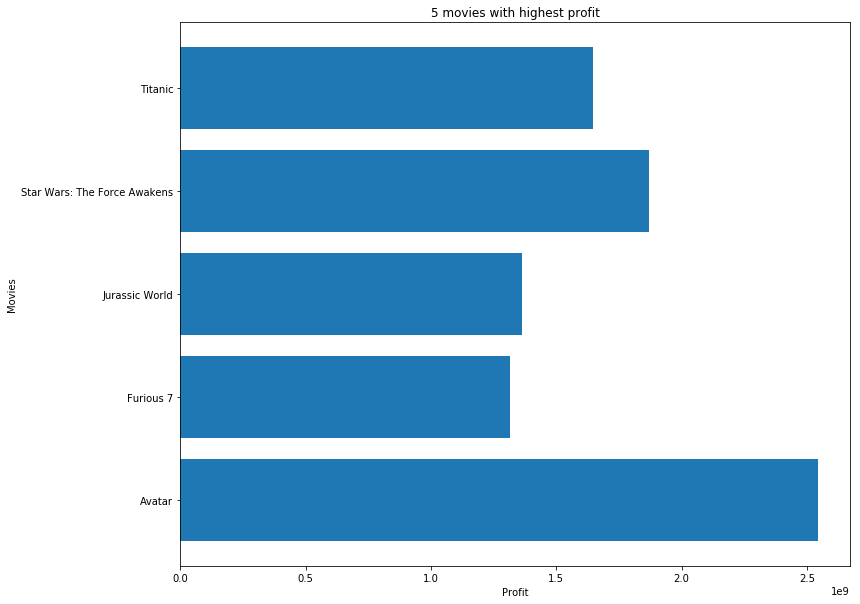

In [17]:
cols = ["original_title","Profit"]
profit_df = df[cols]

# getting the movies with highest profit
high_profit_df = profit_df.sort_values("Profit", ascending = False)

# getting the top 5 movies
top_five = high_profit_df.iloc[:5]
top_five = top_five.sort_values("Profit")

fig = plt.figure()
fig.set_size_inches(12,10)
plt.title("5 movies with highest profit")
plt.ylabel("Movies")
plt.xlabel("Profit")
plt.barh(top_five["original_title"],top_five["Profit"])
plt.show()

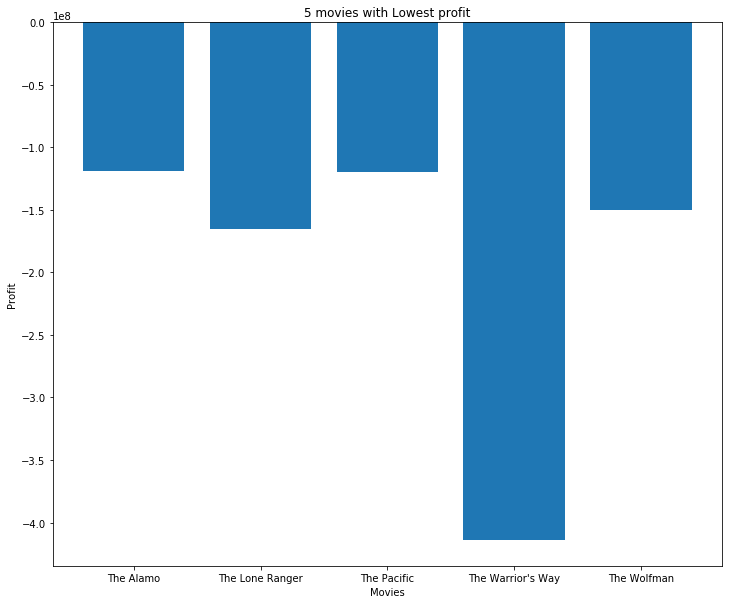

In [18]:
low_profit_df = profit_df.sort_values("Profit")

# getting the least 5 movies
least_five = low_profit_df.iloc[:5]
least_five = least_five.sort_values("Profit",ascending = False)

fig = plt.figure()
fig.set_size_inches(12,10)
plt.title("5 movies with Lowest profit")
plt.ylabel("Profit")
plt.xlabel("Movies")
plt.bar(least_five["original_title"],least_five["Profit"])
plt.show()

### Research Question 2  Which Movies have the highest Average Votes?

In [19]:
cols = ["original_title","vote_average"]
vote_df = df[cols]

In [20]:
find_minmax('vote_average')

Movie Which Has Highest vote_average :  The Story of Film: An Odyssey
Movie Which Has Lowest vote_average  :  Transmorphers


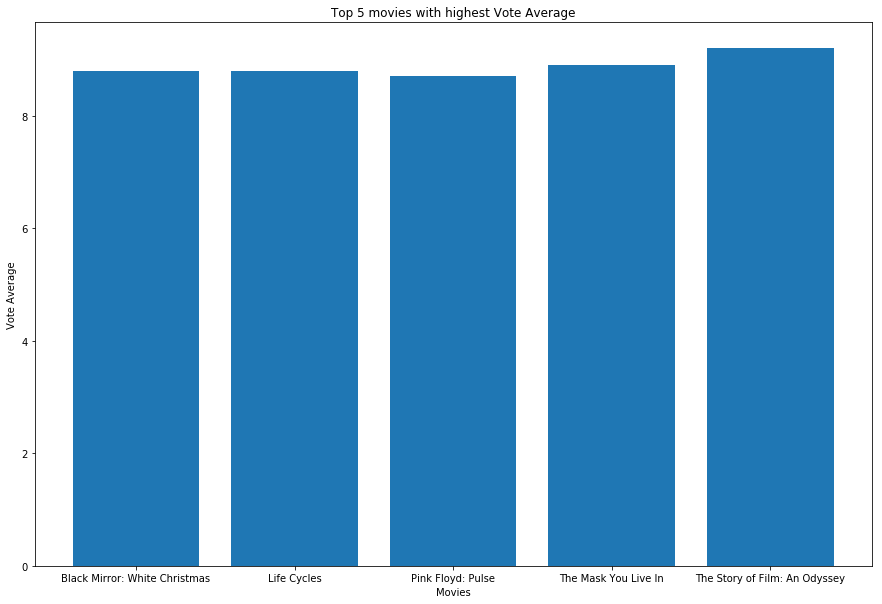

In [21]:
# getting the movies with highest vote average
high_vote_df = vote_df.sort_values("vote_average", ascending = False)

# getting the top 5 movies
vote_top_five = high_vote_df.iloc[:5]
vote_top_five = vote_top_five.sort_values("vote_average")

fig = plt.figure()
fig.set_size_inches(15,10)
plt.title("Top 5 movies with highest Vote Average")
plt.ylabel("Vote Average")
plt.xlabel("Movies")
plt.bar(vote_top_five["original_title"],vote_top_five["vote_average"])
plt.show()

### Research Question 3 Which year was the most movies released?

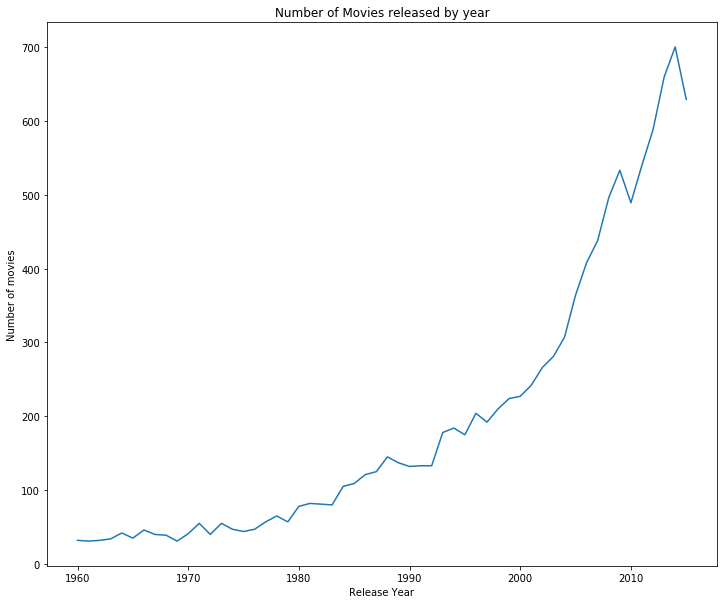

In [22]:
# group each year by number of times it appears
year = df.groupby('release_year').count()['id']

# plotting the year by count of years
fig = plt.figure()
fig.set_size_inches(12,10)
plt.plot(year)
plt.title("Number of Movies released by year")
plt.ylabel("Number of movies")
plt.xlabel("Release Year")
plt.show()

##### Based the plot and the output above we can conclude that 2014 (700) has the highest release of movies  followed by year 2013 (659) and year 2015 (629)

### Question 4: Which Columns are Positively or Negatively correlated?

#### A correlation coefficient is a number that denotes the strength of the relationship between two variables.

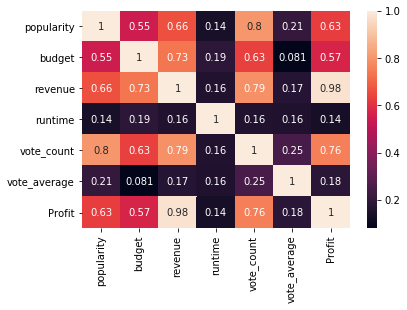

In [23]:
cols = ['popularity', 'budget', 'revenue','runtime','vote_count', 'vote_average',"Profit"]
corr_df = df[cols]
sns.heatmap(corr_df.corr(),annot=True)

#### with the plot above, i discovered that:
- The correlation between the budget and the revenue is 0.73 which makes it positively correlated. i.e There is a good possibility that movies with higher investments result in better revenues.

- The correlation between the popularity and revenue is 0.66 which makes it positively correlated. We can say that if the popularity of movie is high then the revenue of the movie may be high.

- The correlation between revenue and vote average is 0.17. It has zero correlation. which means that average vote is not related to revenue

### Question 5 What Genre has the highest number of movies?

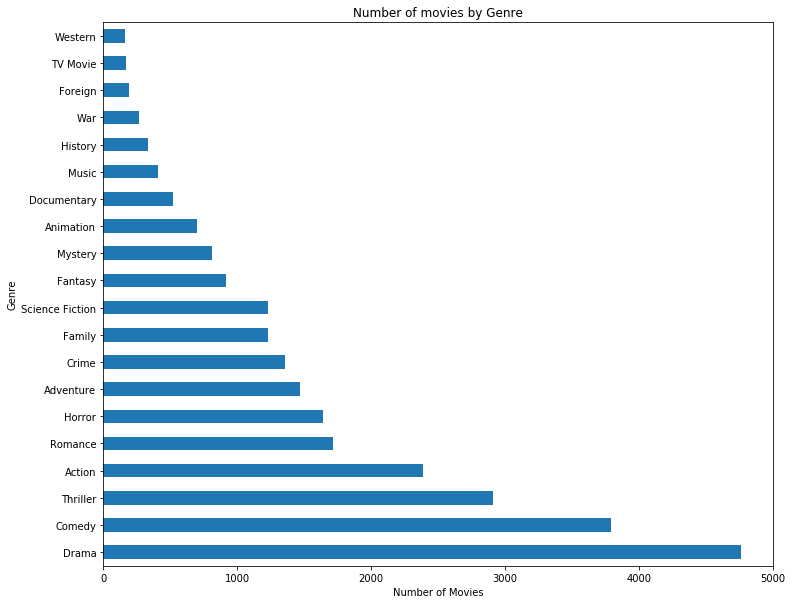

In [24]:
df_genre = df["genres"].str.cat(sep = '|')
data_genre = pd.Series(df_genre.split('|'))
info = data_genre.value_counts(ascending=False)
info

fig = plt.figure()
fig.set_size_inches(12,10)
info.plot(kind = "barh")
plt.title("Number of movies by Genre")
plt.ylabel("Genre")
plt.xlabel("Number of Movies")
plt.show()

<a id='conclusions'></a>
## Conclusions

- Avartar, starwars and titanic are the movies with most profits
- Thw warriors way has the least profit, folowed by lone ranger
- The story of film: an odyssey has the highest vote average followed by The mask you live in
- Drama, Comedy, thriler, Action and romance are the top five most genres made respectively.
- Movies with higher budgets have shown to have high revenues.
- Year 2014 has the highest number of movies made


#### Limitations

- We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.
- There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.
- Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0